<a href="https://colab.research.google.com/github/BannedMatt/FinalProject_2025_Matthew_Banawa_REMA/blob/main/FinalProject_2025_Matthew_Banawa_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing + EDA

In [ ]:
%%bash
wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1qe5hOSBxzIuxBb1G_Ih5X-O65QElollE&export=download&confirm=t&uuid=b2002093-cc6e-4bd5-be47-9603f0b33470
' -O KuaiRec.zip
unzip KuaiRec.zip -d data_final_project

In [2]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# set plot size
plt.rcParams["figure.figsize"] = (20, 13)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [3]:
print("Loading big matrix...")
interactions = pd.read_csv("data_final_project/KuaiRec 2.0/data/big_matrix.csv")

print("Loading social network...")
social_network = pd.read_csv("data_final_project/KuaiRec 2.0/data/social_network.csv")
social_network["friend_list"] = social_network["friend_list"].map(eval)

print("Loading item features...")
item_categories = pd.read_csv("data_final_project/KuaiRec 2.0/data/item_categories.csv")
item_categories["feat"] = item_categories["feat"].map(eval)

print("Loading user features...")
user_features = pd.read_csv("data_final_project/KuaiRec 2.0/data/user_features.csv")

print("Loading items' daily features...")
item_daily_feat = pd.read_csv("data_final_project/KuaiRec 2.0/data/item_daily_features.csv")

Loading big matrix...
Loading social network...
Loading item features...
Loading user features...
Loading items' daily features...


In [4]:
interactions.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000


In [5]:
social_network.head()

,user_id,friend_list
0,3371,[2975]
1,24,[2665]
2,4402,[38]
3,4295,[4694]
4,7087,[7117]


In [6]:
item_categories.head()

,video_id,feat
0,0,[8]
1,1,"[27, 9]"
2,2,[9]
3,3,[26]
4,4,[5]


In [17]:
all_feats = item_categories['feat'].explode().astype(int)

min_feat = all_feats.min()
max_feat = all_feats.max()

print("Minimum feat value:", min_feat)
print("Maximum feat value:", max_feat)

Minimum feat value: 0
Maximum feat value: 30


In [7]:
user_features.head()

,user_id,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,follow_user_num_range,fans_user_num,fans_user_num_range,friend_user_num,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
0,0,high_active,0,0,0,5,"(0,10]",0,0,0,...,184,6,3,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,full_active,0,0,0,386,"(250,500]",4,"[1,10)",2,...,186,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,full_active,0,0,0,27,"(10,50]",0,0,0,...,51,2,3,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,full_active,0,0,0,16,"(10,50]",0,0,0,...,251,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,full_active,0,0,0,122,"(100,150]",4,"[1,10)",0,...,99,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
feat_cols = [f'onehot_feat{i}' for i in range(18)]
subset = user_features[feat_cols]

# Get global min and max across all columns
min_val = subset.min().min()
max_val = subset.max().max()

print("Minimum value across all onehot_feat columns:", min_val)
print("Maximum value across all onehot_feat columns:", max_val)

Minimum value across all onehot_feat columns: 0.0
Maximum value across all onehot_feat columns: 1075.0


the feat in item_categories and the one hot feats in user_features are definitely not the same thing. the one in item categories probably stands for genres or tags but i'm not sure about the ones in user_features

In [8]:
item_daily_feat.head()

,video_id,date,author_id,video_type,upload_dt,upload_type,visible_status,video_duration,video_width,video_height,...,download_cnt,download_user_num,report_cnt,report_user_num,reduce_similar_cnt,reduce_similar_user_num,collect_cnt,collect_user_num,cancel_collect_cnt,cancel_collect_user_num
0,0,20200705,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,8,8,0,0,3,3,NaN,NaN,NaN,NaN
1,0,20200706,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,5,5,NaN,NaN,NaN,NaN
2,0,20200707,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,0,0,0,0,NaN,NaN,NaN,NaN
3,0,20200708,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,3,3,0,0,3,3,NaN,NaN,NaN,NaN
4,0,20200709,3309,NORMAL,2020-03-30,ShortImport,public,5966.0,720,1280,...,2,2,2,1,1,1,NaN,NaN,NaN,NaN


In [9]:
item_daily_feat[['video_width', 'video_height']].drop_duplicates()

,video_width,video_height
0,720,1280
63,886,1015
189,1080,1080
304,720,720
554,360,640
...,...,...
342619,642,1280
343117,721,1166
343121,1080,1022
343178,1242,1242


In [10]:
print(interactions.columns)
print(user_features.columns)
print(item_daily_feat.columns)

Index(['user_id', 'video_id', 'play_duration', 'video_duration', 'time',
       'date', 'timestamp', 'watch_ratio'],
      dtype='object')
Index(['user_id', 'user_active_degree', 'is_lowactive_period',
       'is_live_streamer', 'is_video_author', 'follow_user_num',
       'follow_user_num_range', 'fans_user_num', 'fans_user_num_range',
       'friend_user_num', 'friend_user_num_range', 'register_days',
       'register_days_range', 'onehot_feat0', 'onehot_feat1', 'onehot_feat2',
       'onehot_feat3', 'onehot_feat4', 'onehot_feat5', 'onehot_feat6',
       'onehot_feat7', 'onehot_feat8', 'onehot_feat9', 'onehot_feat10',
       'onehot_feat11', 'onehot_feat12', 'onehot_feat13', 'onehot_feat14',
       'onehot_feat15', 'onehot_feat16', 'onehot_feat17'],
      dtype='object')
Index(['video_id', 'date', 'author_id', 'video_type', 'upload_dt',
       'upload_type', 'visible_status', 'video_duration', 'video_width',
       'video_height', 'music_id', 'video_tag_id', 'video_tag_name',
       

In [30]:
#we dont want to recommend items to a user who cant view them
item_daily_feat = item_daily_feat[item_daily_feat['visible_status'] == 'public']

In [11]:
# I do the most simple thing, I remove the rows with missing values
interactions = interactions.dropna()
# I also remove the duplicates
interactions = interactions.drop_duplicates()
# I also remove the rows with negative timestamps
interactions = interactions[interactions["timestamp"] >= 0]
interactions = interactions[interactions['watch_ratio'] >= 0]

In [45]:
item_daily_feat[['video_id', 'video_duration', 'play_cnt', 'play_user_num', 'comment_cnt', 'comment_user_num', 'follow_cnt', 'follow_user_num', 'share_cnt', 'share_user_num']]

,video_id,video_duration,play_cnt,play_user_num,comment_cnt,comment_user_num,follow_cnt,follow_user_num,share_cnt,share_user_num
0,0,5966.0,10141,7485,11,11,284,284,2,2
1,0,5966.0,7321,5490,7,7,201,200,1,1
2,0,5966.0,4757,3724,4,3,131,131,1,1
3,0,5966.0,5172,3961,4,4,179,179,2,2
4,0,5966.0,5392,3946,5,2,186,186,0,0
...,...,...,...,...,...,...,...,...,...,...
343336,10723,4833.0,214,157,0,0,0,0,0,0
343337,10724,54720.0,965,856,29,27,8,8,1,1
343338,10725,15800.0,15487,14672,36,28,12,12,3,2
343339,10726,5132.0,7859,7480,0,0,2,2,1,1


- How many users and items are there in the data?
- What are the data types?
- How many unique users and unique videos?
- Are there timestamps, and if so, what is their range?
- How many interactions are there in the data?
- How many interactions are there per user?
- How many interactions are there per item?
- What is the distribution of the interactions?
- What is the distribution of the interactions per user?
- What is the distribution of the interactions per item?

#### Interactions per User

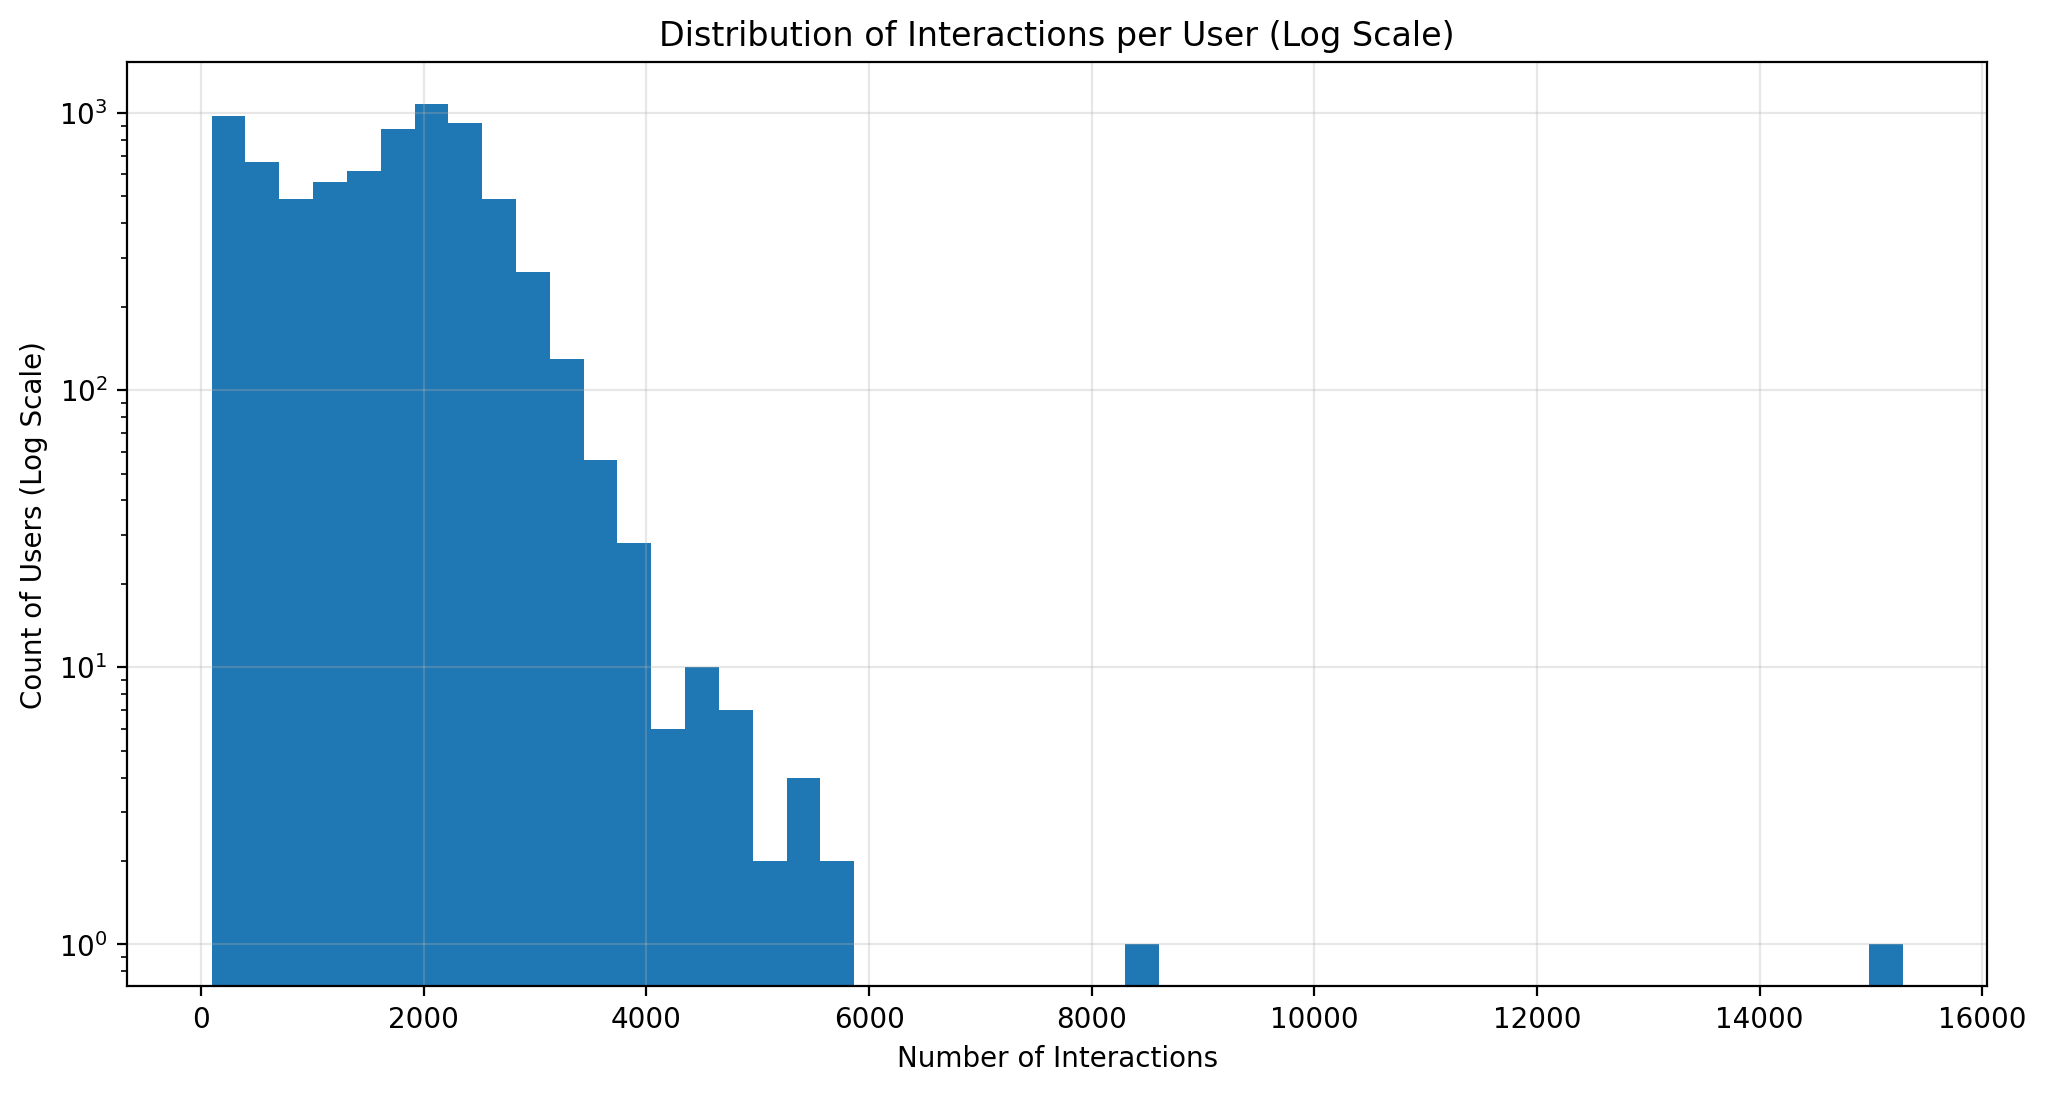

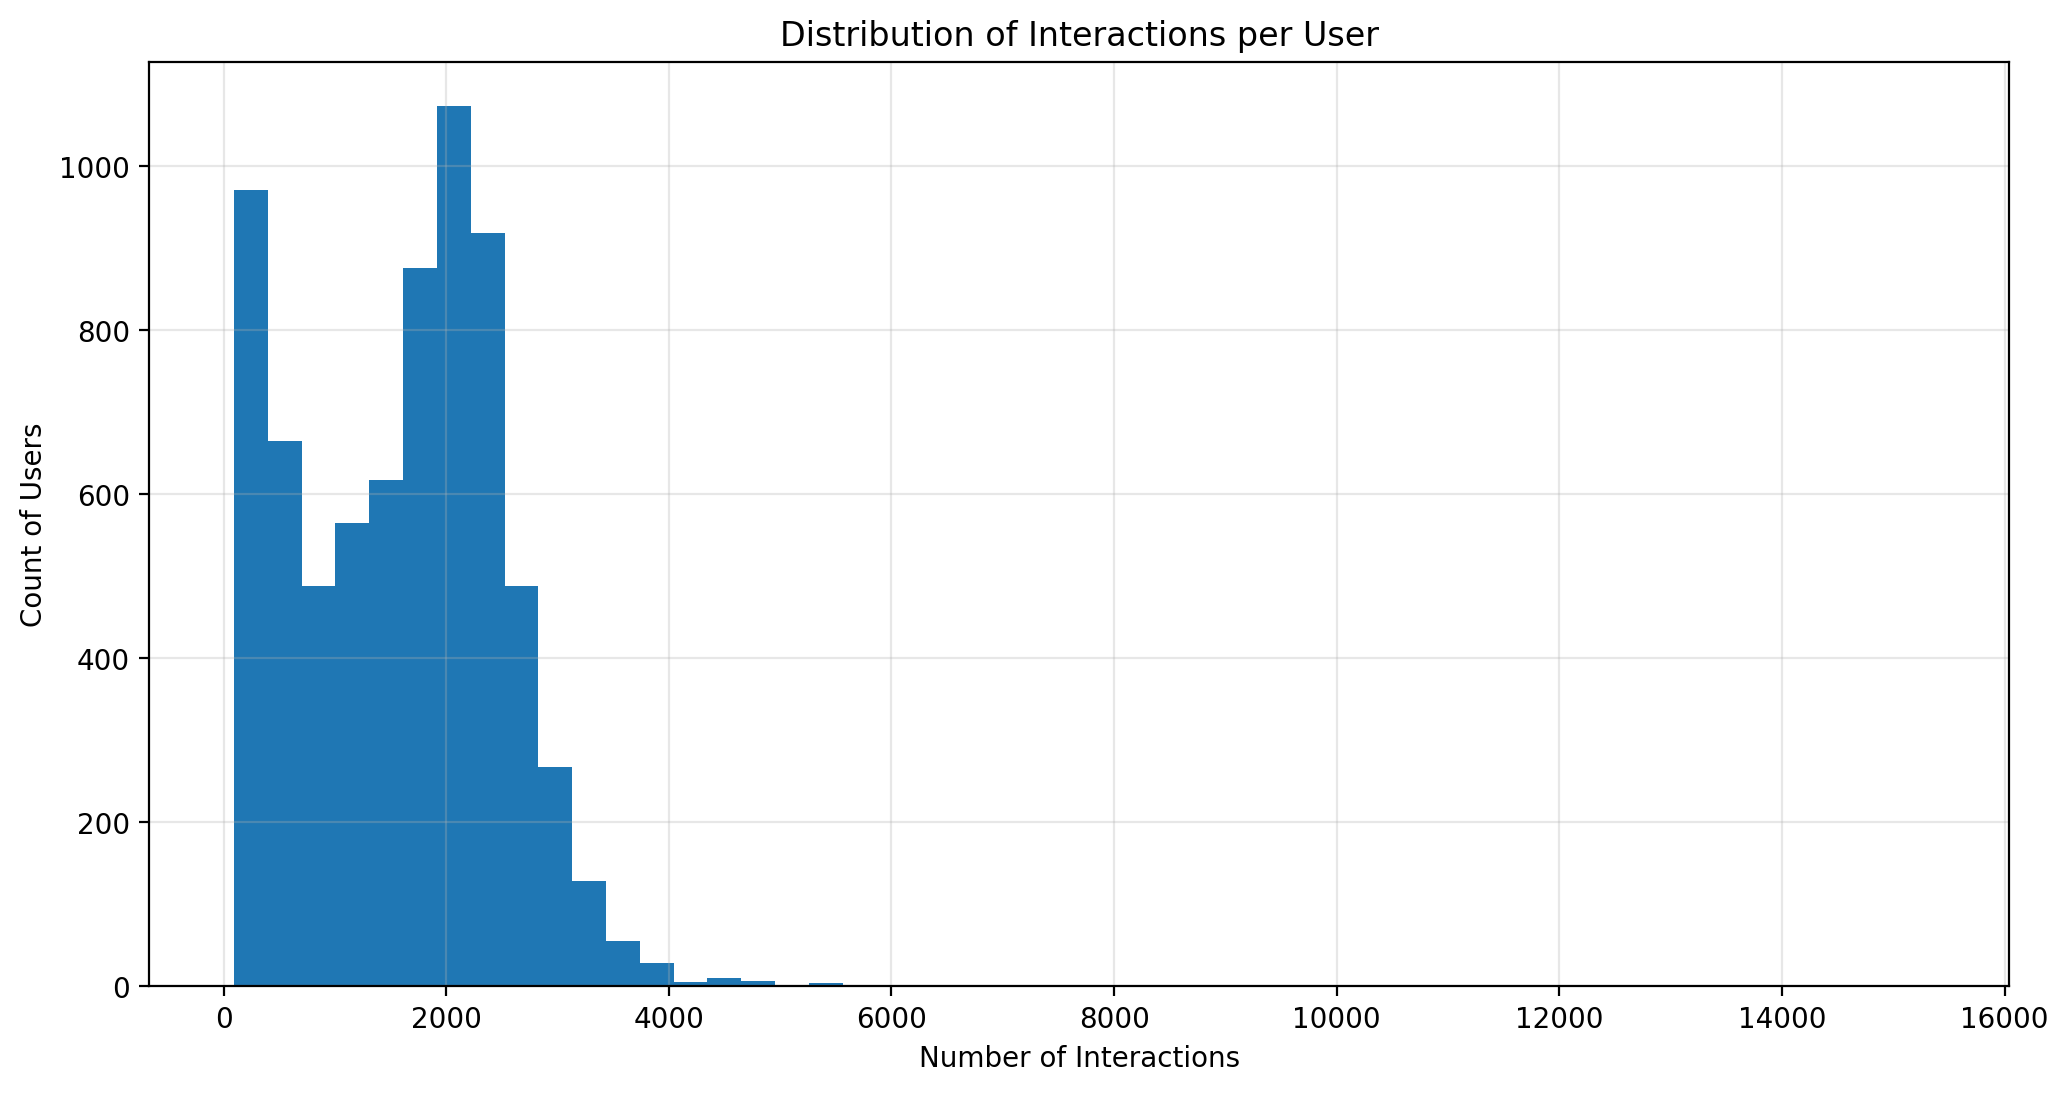

In [12]:
# Plot log histogram of interactions per user
# Get counts per user
user_counts = interactions["user_id"].value_counts()

# Create histogram with log scale
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50, log=True)
plt.title("Distribution of Interactions per User (Log Scale)")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users (Log Scale)")
plt.grid(True, alpha=0.3)
plt.show()

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50)
plt.title("Distribution of Interactions per User")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users")
plt.grid(True, alpha=0.3)
plt.show()

most accounts barely have any interactions and one account has an abnormaly high amount of interactions

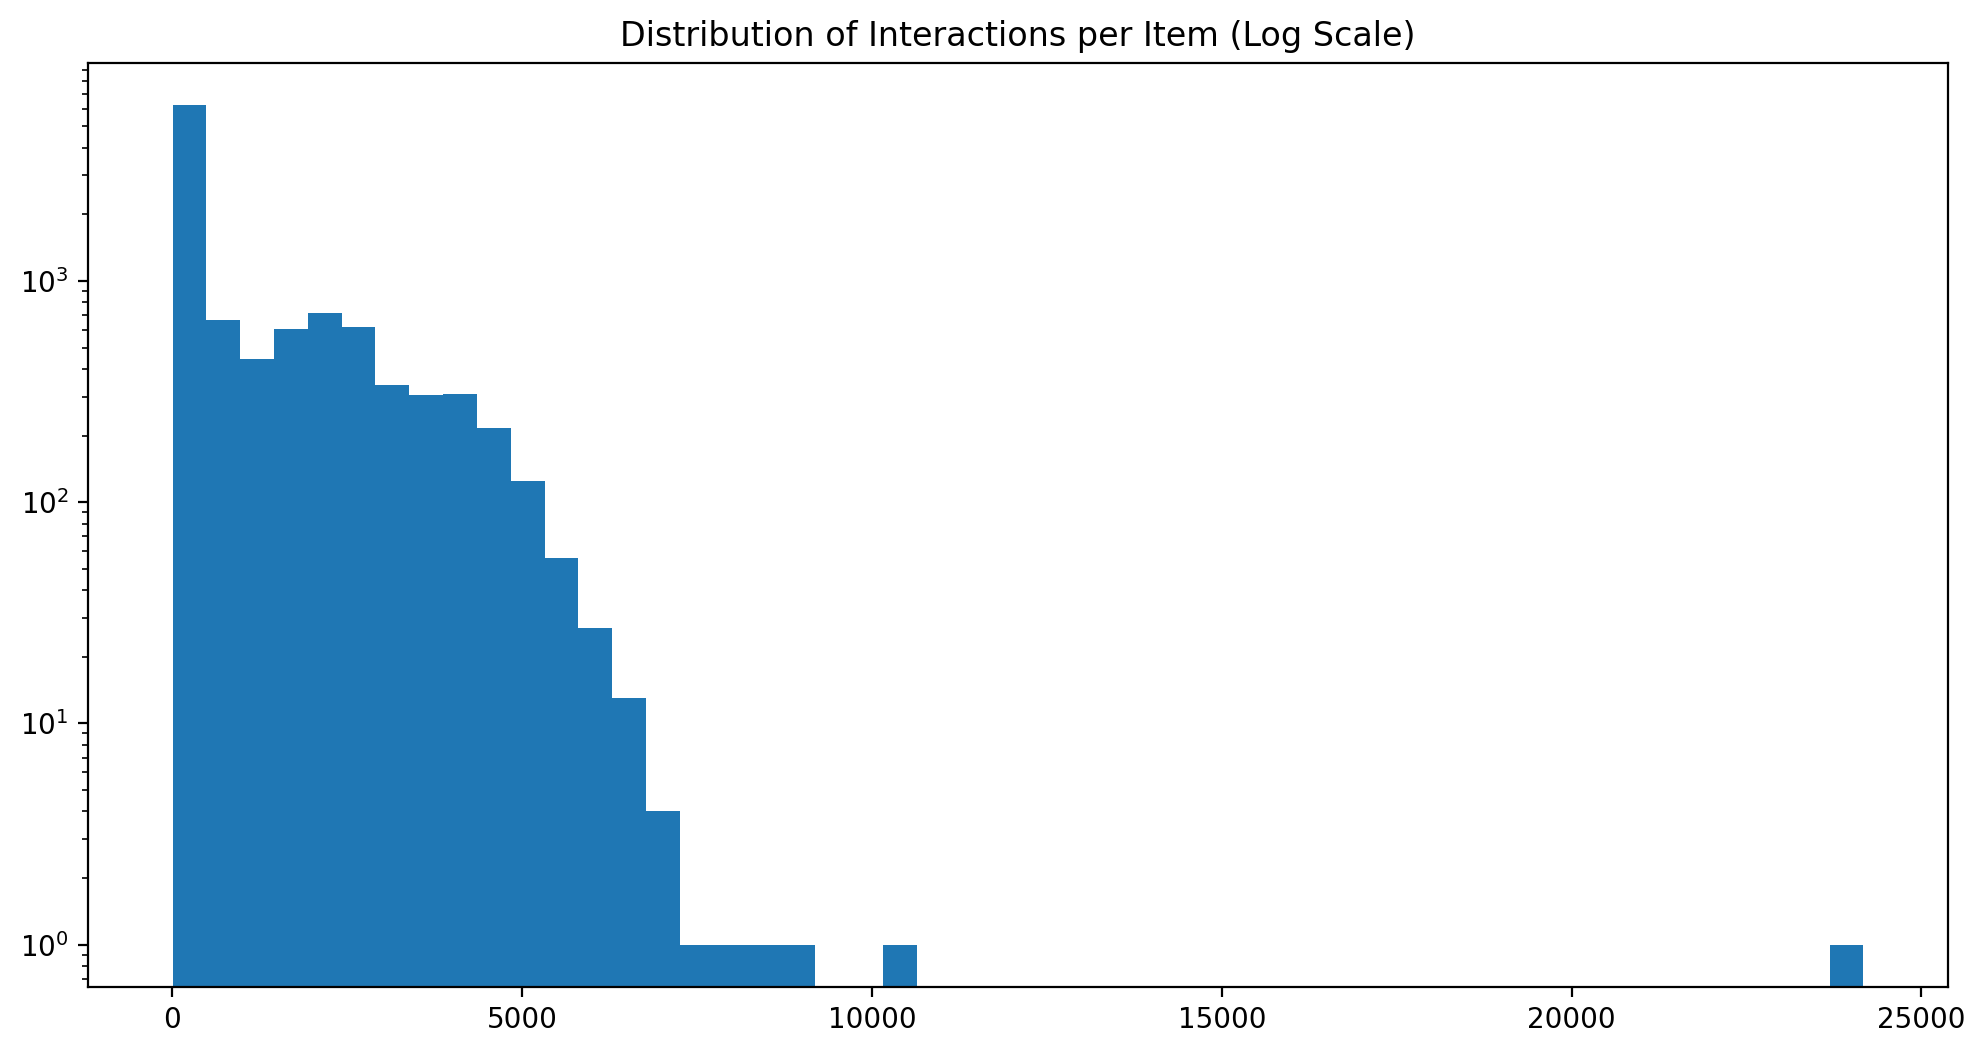

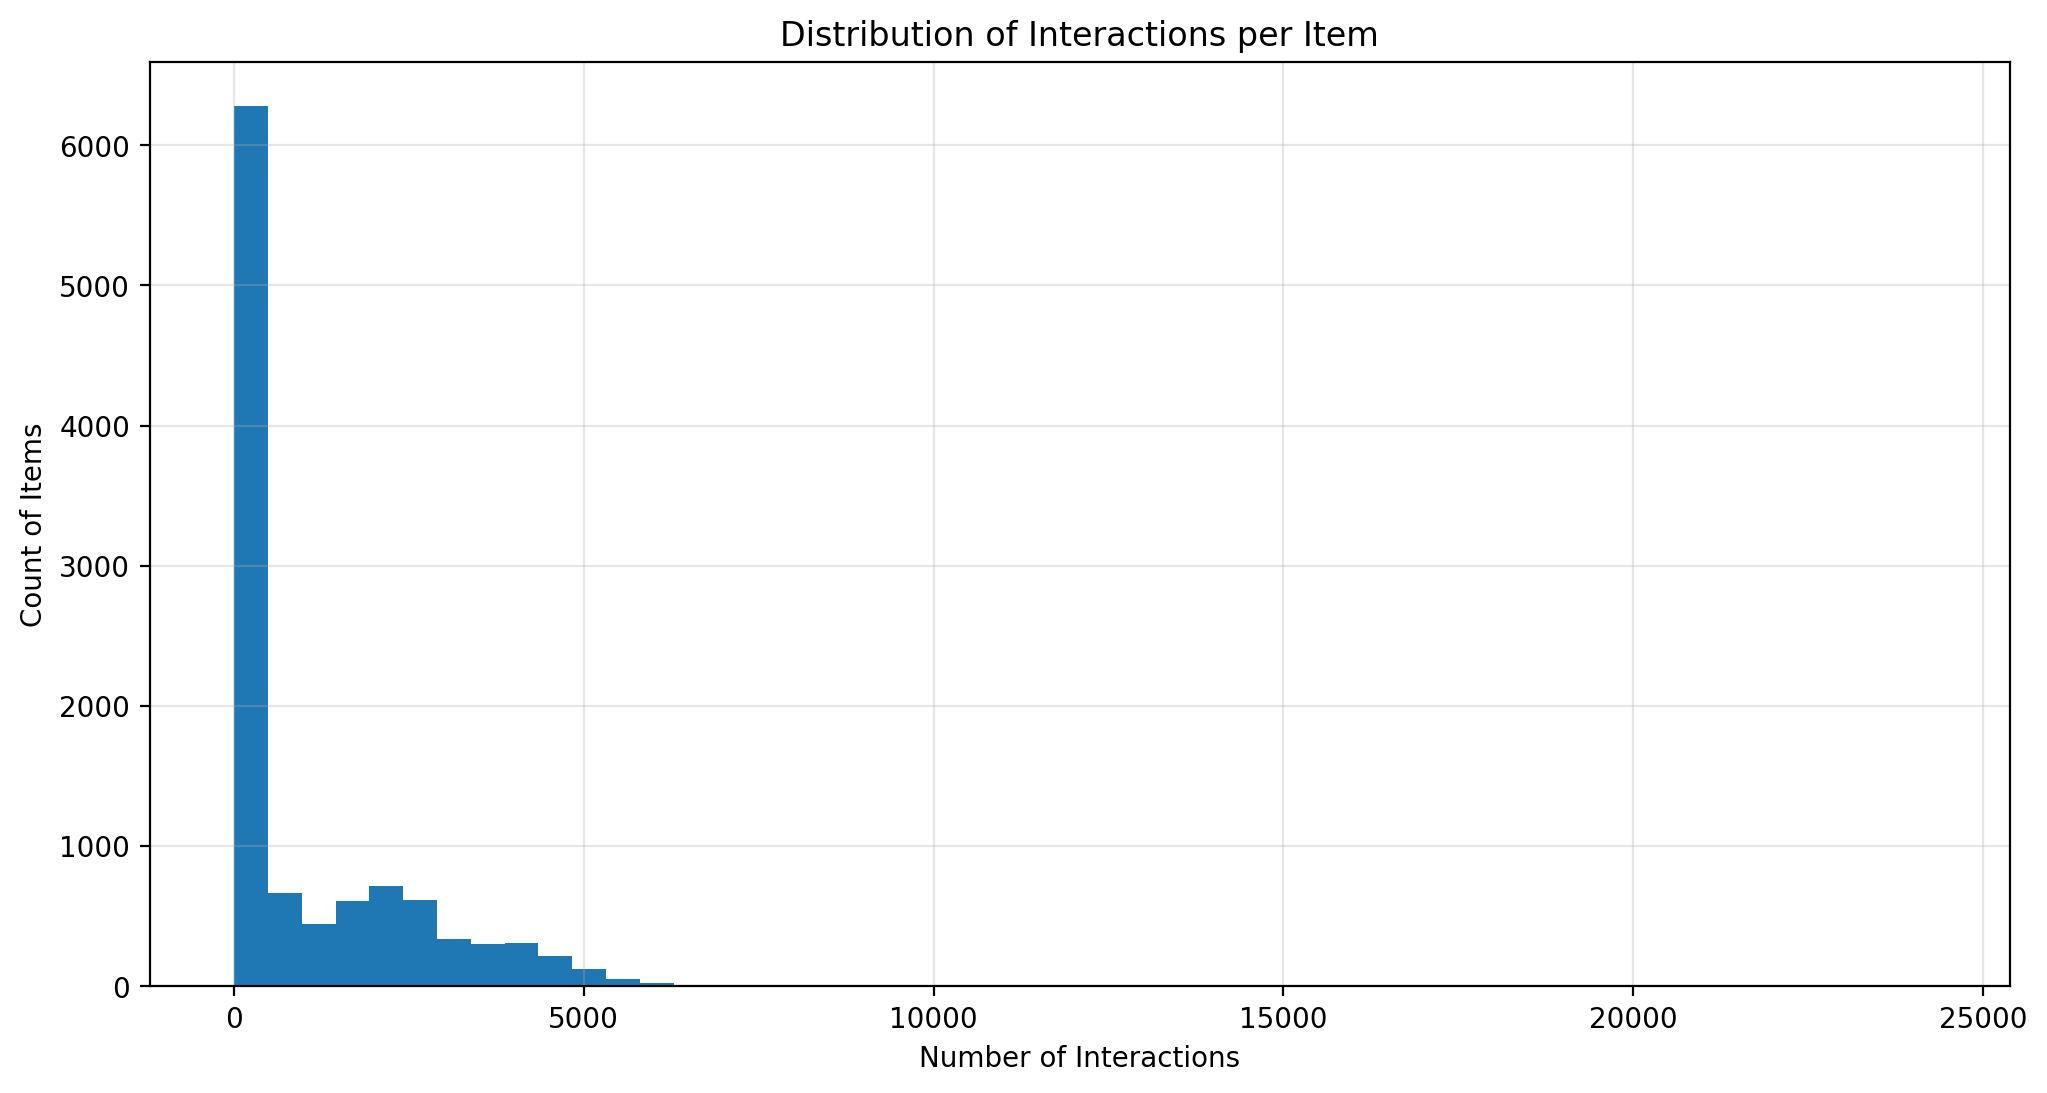

In [13]:
# Let's see the distribution of the interactions per item
item_counts = interactions["video_id"].value_counts()

# Plot log histogram of interactions per item
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50, log=True)
plt.title("Distribution of Interactions per Item (Log Scale)")

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50)
plt.title("Distribution of Interactions per Item")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Items")
plt.grid(True, alpha=0.3)
plt.show()

i guess this means kuaishou app is has a popularity bias

### Temporal Analysis

In [ ]:
interactions["timestamp"] = pd.to_datetime(
    interactions["timestamp"].fillna(0), unit="s"
)

interactions["hour"] = interactions["timestamp"].dt.hour
interactions["day"] = interactions["timestamp"].dt.dayofweek

# Plot activity over time
plt.figure(figsize=(12, 6))
plt.hist(interactions["hour"], bins=24)
plt.title("Distribution of Activity by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Interactions")
plt.grid(True, alpha=0.3)
plt.show()

# Plot activity by day of week
plt.figure(figsize=(12, 6))
plt.hist(interactions["day"], bins=7)
plt.title("Distribution of Activity by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Number of Interactions")
plt.grid(True, alpha=0.3)
plt.show()

# Get top 10 most active users
top_users = interactions["user_id"].value_counts().head(10).index

# Plot activity patterns for top users
plt.figure(figsize=(12, 6))
for user in top_users:
    user_data = interactions[interactions["user_id"] == user]
    plt.hist(user_data["hour"], bins=24, alpha=0.3, label=f"User {user}")
plt.title("Activity Patterns of Top 10 Users by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Interactions")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find peak usage times
hourly_activity = interactions.groupby("hour").size()
peak_hours = hourly_activity.nlargest(3)

print("\nPeak Usage Hours:")
for hour, count in peak_hours.items():
    print(f"Hour {hour}:00 - {count} interactions")

daily_activity = interactions.groupby("day").size()
peak_days = daily_activity.nlargest(3)

print("\nPeak Usage Days:")
for day, count in peak_days.items():
    days = [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ]
    print(f"{days[int(day)]} - {count} interactions")

 # Feature Engineering

Apps like tiktok usually recommend videos similar to the ones that a user has already watched so i think content based filtering would be a good idea. Furthermore, we should also probably use a neural network since we want to take into account each user's preferences

We create a dataframe of user vectors and another for item vectors which will be the data given to their respective neural networks

In [39]:
print('interactions')
print(interactions.columns)
print('item_daily_feat')
print(item_daily_feat.columns)
print('item_category')
print(item_categories.columns)

interactions
Index(['user_id', 'video_id', 'play_duration', 'video_duration', 'time',
       'date', 'timestamp', 'watch_ratio', 'hour', 'day'],
      dtype='object')
item_daily_feat
Index(['video_id', 'date', 'author_id', 'video_type', 'upload_dt',
       'upload_type', 'visible_status', 'video_duration', 'video_width',
       'video_height', 'music_id', 'video_tag_id', 'video_tag_name',
       'show_cnt', 'show_user_num', 'play_cnt', 'play_user_num',
       'play_duration', 'complete_play_cnt', 'complete_play_user_num',
       'valid_play_cnt', 'valid_play_user_num', 'long_time_play_cnt',
       'long_time_play_user_num', 'short_time_play_cnt',
       'short_time_play_user_num', 'play_progress', 'comment_stay_duration',
       'like_cnt', 'like_user_num', 'click_like_cnt', 'double_click_cnt',
       'cancel_like_cnt', 'cancel_like_user_num', 'comment_cnt',
       'comment_user_num', 'direct_comment_cnt', 'reply_comment_cnt',
       'delete_comment_cnt', 'delete_comment_user_num', 'co

In [41]:
# Step 1: Explode feats from item_categories
item_cat_exploded = item_categories.copy()
item_cat_exploded['feat'] = item_cat_exploded['feat'].apply(lambda x: x if isinstance(x, list) else [x])
item_cat_exploded = item_cat_exploded.explode('feat').astype({'feat': int})

# Step 2: Merge with interactions to get user + feat + watch_ratio
inter_feat = interactions.merge(item_cat_exploded, on='video_id', how='inner')

# Step 3: Compute average watch_ratio per user per feat
user_feat_avg = inter_feat.groupby(['user_id', 'feat'])['watch_ratio'].mean().reset_index()

# Step 4: Pivot into wide format: one column per feat (feat_0, feat_1, ...)
user_feat_matrix = user_feat_avg.pivot(index='user_id', columns='feat', values='watch_ratio').fillna(0)
user_feat_matrix.columns = [f'feat_{i}' for i in user_feat_matrix.columns]
user_feat_matrix = user_feat_matrix.reset_index()

# Step 5: Merge back (user_id, video_id) to build final user_data
user_data = interactions[['user_id', 'video_id']].drop_duplicates()
user_data = user_data.merge(user_feat_matrix, on='user_id', how='left')

In [42]:
user_data

,user_id,video_id,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,...,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30
0,0,3649,0.845523,0.935176,0.877975,1.027538,0.716372,0.970248,0.850679,1.043819,...,1.092595,0.229430,1.172116,2.183256,1.254409,1.364216,0.640866,1.089462,1.032785,0.467586
1,0,9598,0.845523,0.935176,0.877975,1.027538,0.716372,0.970248,0.850679,1.043819,...,1.092595,0.229430,1.172116,2.183256,1.254409,1.364216,0.640866,1.089462,1.032785,0.467586
2,0,5262,0.845523,0.935176,0.877975,1.027538,0.716372,0.970248,0.850679,1.043819,...,1.092595,0.229430,1.172116,2.183256,1.254409,1.364216,0.640866,1.089462,1.032785,0.467586
3,0,1963,0.845523,0.935176,0.877975,1.027538,0.716372,0.970248,0.850679,1.043819,...,1.092595,0.229430,1.172116,2.183256,1.254409,1.364216,0.640866,1.089462,1.032785,0.467586
4,0,8234,0.845523,0.935176,0.877975,1.027538,0.716372,0.970248,0.850679,1.043819,...,1.092595,0.229430,1.172116,2.183256,1.254409,1.364216,0.640866,1.089462,1.032785,0.467586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10300964,7175,6630,0.523201,1.372687,0.681181,0.000000,1.840583,1.561322,1.072667,1.882894,...,0.748739,0.090196,0.000000,0.000000,1.604561,1.539258,0.369725,1.589597,1.380674,0.403866
10300965,7175,1281,0.523201,1.372687,0.681181,0.000000,1.840583,1.561322,1.072667,1.882894,...,0.748739,0.090196,0.000000,0.000000,1.604561,1.539258,0.369725,1.589597,1.380674,0.403866
10300966,7175,3407,0.523201,1.372687,0.681181,0.000000,1.840583,1.561322,1.072667,1.882894,...,0.748739,0.090196,0.000000,0.000000,1.604561,1.539258,0.369725,1.589597,1.380674,0.403866
10300967,7175,10360,0.523201,1.372687,0.681181,0.000000,1.840583,1.561322,1.072667,1.882894,...,0.748739,0.090196,0.000000,0.000000,1.604561,1.539258,0.369725,1.589597,1.380674,0.403866


# Model Development

# Recommendation Algorithm

# Evaluation